# SD212: Graph mining
## Lab 4: Graph clustering

In this lab, you will learn to cluster a graph and interpret the results. 

## Import

In [2]:
from IPython.display import SVG

In [3]:
import numpy as np
from scipy import sparse

In [435]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, BiLouvain, modularity, bimodularity
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph

## Pre-lab training

In [5]:
bbb = np.array([[0, 1, 0],
                [1, 0, 1],
                [1, 0, 0]
                ])
v = np.ones(3).T.dot(bbb.dot(np.ones(3)))
v

4.0

In [6]:
d = bbb.dot(np.ones(3)).reshape(-1, 1)
dT = d.reshape(1, -1)
A_hat = d.dot(dT)/v
print(A_hat)
np.ones(3).T.dot(A_hat.dot(np.ones(3)))

[[0.25 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.25]]


4.0

In [88]:
lab = np.array([1, 2, 3])
mat = np.array([[6, 2, 0], [2, 2, 4], [0, 4, 4]])
modularity(mat, lab)

0.16666666666666669

In [85]:
mat, lab

(array([[6, 2, 0],
        [2, 2, 4],
        [0, 4, 4]]),
 array([1, 2, 3, 1, 2, 3, 1, 2, 3]))

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [7]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Parsing files...
Done.
Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [146]:
n = 9
graph = grid(n, n, True)
adjacency = graph.adjacency
position = graph.position

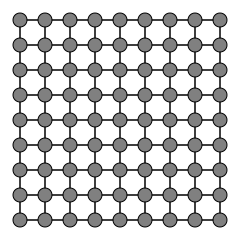

In [147]:
image = svg_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and display it with the labels.
* What is the modularity?
* Try the ``shuffle_nodes`` option and observe the results.
* Find a better clustering than Louvain in terms of modularity. **Hint:** Guess and calculate!

In [148]:
louvain = Louvain(shuffle_nodes=False)

In [149]:
labels = louvain.fit_transform(adjacency)

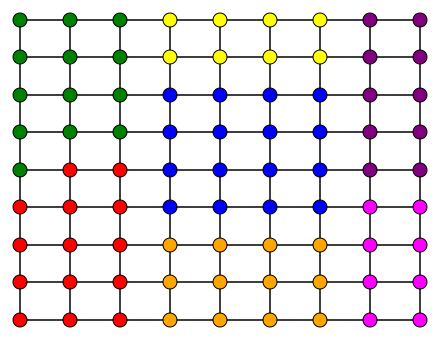

In [41]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [42]:
print("The modularity of this clustering is", modularity(adjacency, labels))

The modularity of this clustering is 0.6220341435185185


The modularity of this clustering is 0.632788387345679


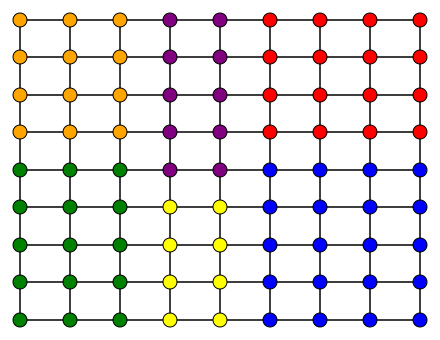

In [26]:
louvainShuffled = Louvain(shuffle_nodes=True)
labels = louvainShuffled.fit_transform(adjacency)
print("The modularity of this clustering is", modularity(adjacency, labels))
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

Turning `shuffle_nodes` on, we notice the clustering that differs on each run. This means a high variance in the Louvain algorithm since it is greedy and depends on the initial order of nodes.

The greediness of Louvain makes it possible to have two completely different clusterings based on just the first node you’ll consider.

In [73]:
labels = np.ones(n*n, dtype=int)
my_labels = np.array(
    [1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1, 1, 2, 2, 2, 3, 3, 3,
     4, 4, 4, 5, 5, 5, 6, 6, 6, 4, 4, 4, 5, 5, 5, 6, 6, 6, 4, 4, 4, 5, 5, 5, 6, 6, 6,
     7, 7, 7, 8, 8, 8, 9, 9, 9, 7, 7, 7, 8, 8, 8, 9, 9, 9, 7, 7, 7, 8, 8, 8, 9, 9, 9])

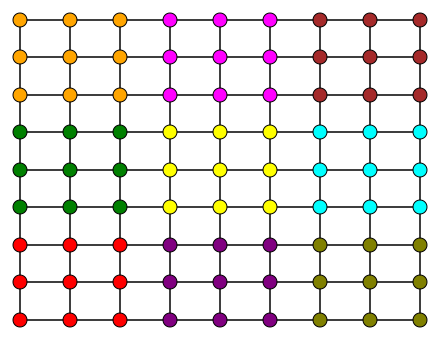

In [75]:
image = svg_graph(adjacency, position, labels=my_labels)
SVG(image)

In [77]:
modularity(adjacency, my_labels)

0.638454861111111

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [463]:
graph = karate_club(metadata=True)

In [464]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

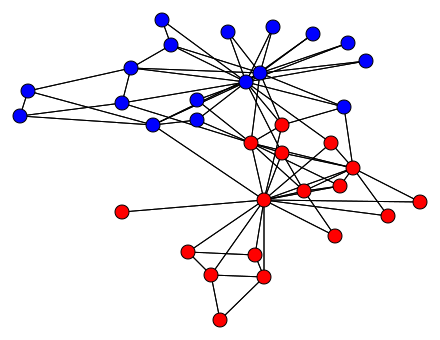

In [91]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels.
* What is the modularity?
* Display the aggregate graph.
* Adapt the resolution to get 2 clusters. How many nodes are misclassified?

##### Default Louvain


In [468]:
louvain = Louvain()

In [469]:
labels = louvain.fit_transform(adjacency)

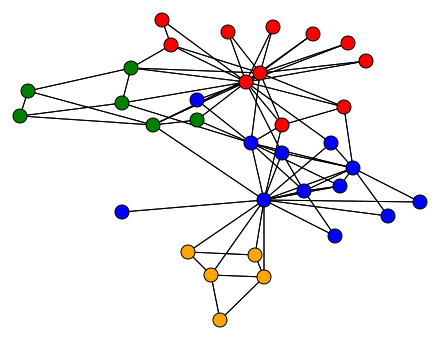

In [112]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

##### Modularity


In [113]:
modularity(adjacency, labels)

0.4188034188034188

##### Aggregate graph


In [114]:
adjacency_aggregate = louvain.adjacency_

In [115]:
average_aggregate = normalize(membership_matrix(labels).T)
position_aggregate = average_aggregate.dot(position)

In [116]:
labels_unique, counts = np.unique(labels, return_counts=True)

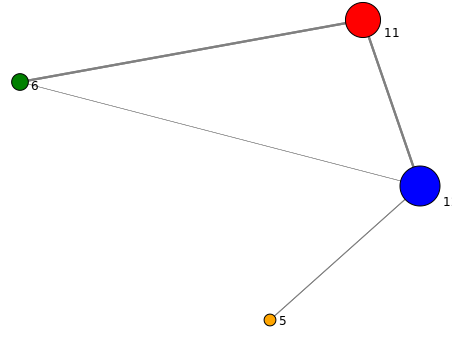

In [101]:
image = svg_graph(adjacency_aggregate, position_aggregate,
                  names=counts, labels=labels_unique, display_node_weight=True)
SVG(image)

##### Adaptation


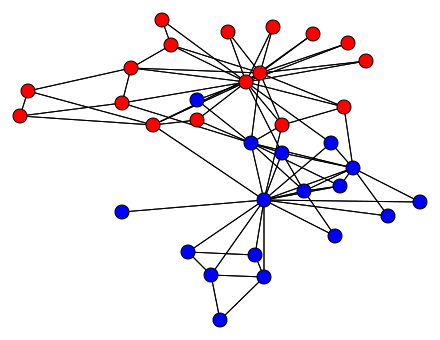

In [470]:
louvain_adapt = Louvain(resolution=0.5)
labels_adapt = louvain_adapt.fit_transform(adjacency)
image = svg_graph(adjacency, position, labels=labels_adapt)
SVG(image)

In [471]:
errors = len(labels) - sum(louvain_adapt.labels_ != labels_true)
print(errors, "nodes are misclassified")

2 nodes are misclassified


In [472]:
louvain_adapt = Louvain(resolution=0.6)
labels_adapt = louvain_adapt.fit_transform(adjacency)
errors = len(labels) - sum(louvain_adapt.labels_ != labels_true)
print(errors, "nodes are misclassified")

2 nodes are misclassified


## Openflights


In [481]:
graph = openflights

In [482]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

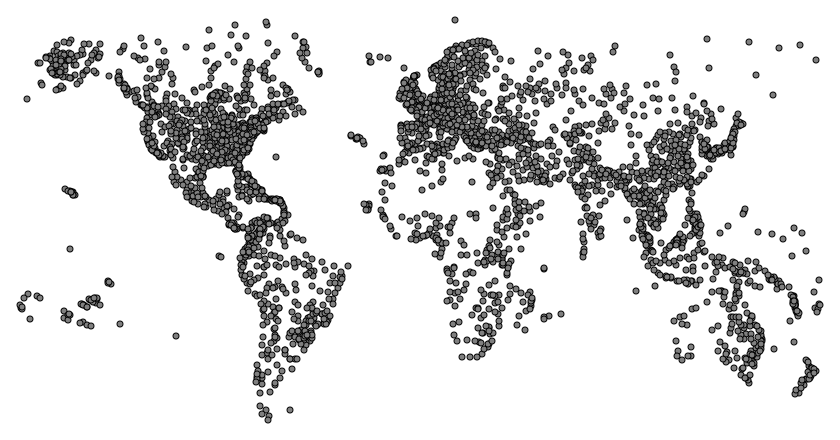

In [483]:
image = svg_graph(adjacency, position, width=800, height=400,
                  node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? Check the parameters of the function ``modularity``.
* How do you interpret the *inverse* of the Simpson index?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph with the cluster volumes and the name of the top airport of each cluster.
* What is the strongest cluster among those having more than 100 nodes? **Hint:** Use the aggregate graph.

##### Louvain on flights


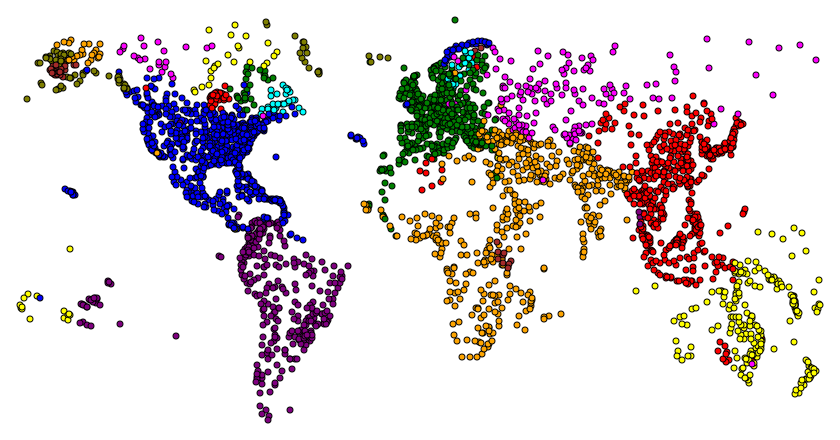

In [484]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)
image = svg_graph(adjacency, position, width=800, height=400,
                  node_size=3, display_edges=False, labels=labels)
SVG(image)

In [542]:
nb_clusters = max(labels) + 1  # 0-indexed labels
print("there are", nb_clusters, "clusters")

there are 35 clusters


##### Simpson Index

In [486]:
modul, fit, diversity = modularity(adjacency, labels, return_all=True)

In [487]:
print("The Simpson Index of this graph is", "{:1.4}".format(diversity))

The Simpson Index of this graph is 0.2155


In [488]:
1/nb_clusters

0.02857142857142857

Comparing the diversity to the inverse of the number of clusters, we find that the diversity is higher, meaning that there could be a more diverse graph.

##### The inverse of the Simpson Index

In [489]:
print("The inverse of the Simpson Index is", "{:1.4}".format(1/diversity))

The inverse of the Simpson Index is 4.641


This number represents the number of dominant clusters given the currenct concentration of this graph.

It gives you a rough idea of the number of clusters. To be more precise: if you have one dominant cluster, the inverse will be close to 1 but if your K clusters are well-balanced, the inverse will be close to K.


##### Top airport of each cluster in number of flights

In [492]:
max(degrees[idx])

4.0

In [493]:
np.argmax(degrees[np.where(labels == 33)[0]])

0

In [494]:
degrees = adjacency.dot(np.ones(adjacency.shape[1]))
top_airports = []
for label in set(labels):
    idx = np.where(labels == label)[0]
    current_names = names[idx]
    top = current_names[np.argmax(degrees[idx])]
    print("cluster", label + 1, ":", top)
    top_airports.append(top)

cluster 1 : Hartsfield Jackson Atlanta International Airport
cluster 2 : Beijing Capital International Airport
cluster 3 : Amsterdam Airport Schiphol
cluster 4 : Atatürk International Airport
cluster 5 : Guarulhos - Governador André Franco Montoro International Airport
cluster 6 : Sydney Kingsford Smith International Airport
cluster 7 : Domodedovo International Airport
cluster 8 : Ted Stevens Anchorage International Airport
cluster 9 : Quebec Jean Lesage International Airport
cluster 10 : Bethel Airport
cluster 11 : Trondheim Airport Værnes
cluster 12 : Sioux Lookout Airport
cluster 13 : Kuujjuarapik Airport
cluster 14 : Fairbanks International Airport
cluster 15 : Faa'a International Airport
cluster 16 : Rankin Inlet Airport
cluster 17 : Yellowknife Airport
cluster 18 : Godthaab / Nuuk Airport
cluster 19 : Stockholm-Bromma Airport
cluster 20 : Nairobi Wilson Airport
cluster 21 : João Paulo II Airport
cluster 22 : Touat Cheikh Sidi Mohamed Belkebir Airport
cluster 23 : Kirkwall Airport

##### Aggregate graphs with top airports

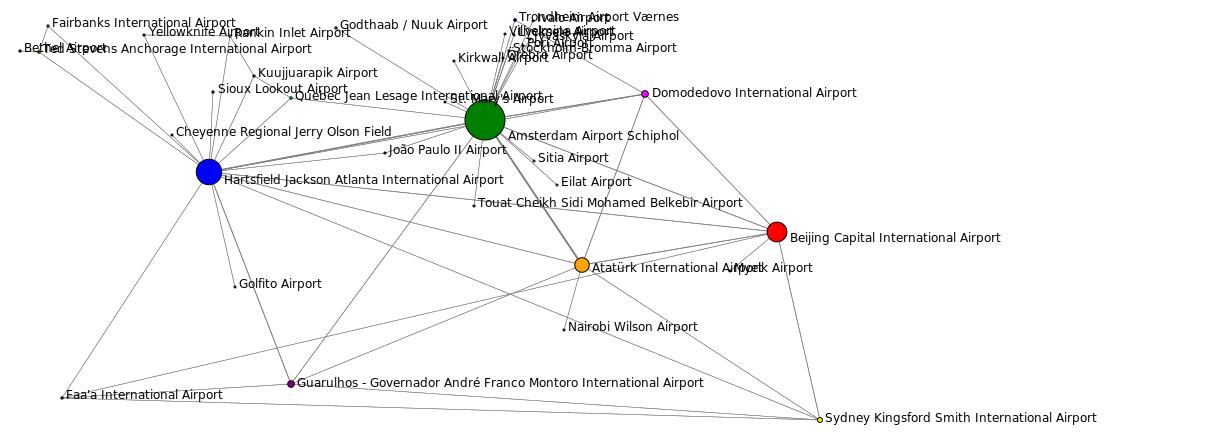

In [495]:
adjacency_aggregate = louvain.adjacency_
average_aggregate = normalize(membership_matrix(labels).T)
position_aggregate = average_aggregate.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate, position_aggregate,
                  width=800, height=400, node_size=3, display_edges=True, 
                  names=top_airports, labels=labels_unique, display_node_weight=True)
SVG(image)

##### Strongest cluster

In [543]:
# among all
rhos_all = adjacency_aggregate.diagonal()/ adjacency_aggregate.sum(axis=1).T
top_airports[np.argmax(rhos_all)]

'Godthaab / Nuuk Airport'

In [564]:
# for airports above 100 airports links
idx = np.where(counts > 100)[0]
rhos = adjacency_aggregate.diagonal()[idx] / adjacency_aggregate.sum(axis=1)[idx].T
rhos = np.array(rhos)[0]
print("the strongest cluster between those having more than 100 airports is", np.argmax(rhos) + 1,
      ", it has a stength of", np.max(rhos))
print("\nthe top airport (most links) in the top clusters (most counts) is", top_airports[np.argmax(rhos)])

the strongest cluster between those having more than 100 airports is 2 , it has a stength of 0.9116989567809239

the top airport (most links) in the top clusters (most counts) is Beijing Capital International Airport


In [560]:
### shiould be adapted for only clusters with more than 100 nodes!!! 
### use the agg_adj_mat to get strengths... NO! use the counts to set the condition!

In [214]:
# maxInd = (0,0)
# maxWeight = 0
# idx = np.where(np.diagonal(adjacency_aggregate.toarray()) > 100)
# cx = sparse.coo_matrix(adjacency_aggregate)
# for ind, weight in zip(zip(cx.row, cx.col), cx.data):
#     if (weight> maxWeight):
#         maxInd = ind
#         maxWeight = weight

In [217]:
# maxInd, maxWeight

((2, 2), 20180)

In [219]:
#agg_degrees = adjacency_aggregate.dot(np.ones(adjacency_aggregate.shape[1]))

In [220]:
#names[np.argmax(agg_degrees)]

2

## 2. Directed graphs

## Wikipedia Vitals

In [320]:
graph = wikivitals

In [321]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank (with restart in the cluster).
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* What is the strongest cluster? the weakest cluster?
* Do the same experiments at resolution 2.

##### Louvain clustering

In [322]:
louvain = Louvain(resolution=1)
labels = louvain.fit_transform(adjacency)

In [323]:
labels_unique, counts = np.unique(labels, return_counts=True)

Now, we use the labels to initiate the PageRank seed set.

run PageRank on the whole graph but setting the seed set alternatively to each cluster

##### Top-5 pages of each cluster

In [324]:
for label in labels_unique:
    idx = np.where(labels == label)[0]
    current_names = names[idx]
    seeds = dict(zip(idx, np.ones(len(idx))))
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency, seeds = seeds)
    print("Top 5 pages in closeness to cluster", label+1, ":")
    top_nodes = top_k(scores, 5)
    for i, node in enumerate(top_nodes):
        print(i + 1, "{:.3%}".format(scores[top_nodes[i]]), names[node])
    print()

Top 5 pages in closeness to cluster 1 :
1 0.283% Taxonomy (biology)
2 0.281% Bibliothèque nationale de France
3 0.239% Animal
4 0.195% United States
5 0.194% Latin

Top 5 pages in closeness to cluster 2 :
1 0.349% Bibliothèque nationale de France
2 0.193% Mathematics
3 0.162% United States
4 0.157% Physics
5 0.143% Oxygen

Top 5 pages in closeness to cluster 3 :
1 0.427% Bibliothèque nationale de France
2 0.325% United States
3 0.263% Geographic coordinate system
4 0.233% France
5 0.220% United Kingdom

Top 5 pages in closeness to cluster 4 :
1 0.456% Bibliothèque nationale de France
2 0.189% Latin
3 0.168% United States
4 0.156% Christianity
5 0.154% France

Top 5 pages in closeness to cluster 5 :
1 0.374% Bibliothèque nationale de France
2 0.303% Geographic coordinate system
3 0.213% China
4 0.209% India
5 0.202% United States

Top 5 pages in closeness to cluster 6 :
1 0.662% Bibliothèque nationale de France
2 0.332% The New York Times
3 0.209% United States
4 0.194% World War II
5 0

We see that for example the Bibliothèque nationale de France is shown in almost all clusters. That is normal because we are just initializing seeds from the same cluster with higher weights without removing totally the other pages from comparison.

In order to get better results, we can substract the scores of the normal PageRank from the PersonalizedPageRank:

In [325]:
pagerank0 = PageRank()
scores0 = pagerank.fit_transform(adjacency)

for label in labels_unique:
    idx = np.where(labels == label)[0]
    current_names = names[idx]
    seeds = dict(zip(idx, np.ones(len(idx))))
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency, seeds = seeds)
    scores -= scores0
    print("Top 5 pages in cluster", label+1, ":")
    top_nodes = top_k(scores, 5)
    for i, node in enumerate(top_nodes):
        print(i + 1, "{:.3%}".format(scores[top_nodes[i]]), names[node])
    print()

Top 5 pages in cluster 1 :
1 0.201% Taxonomy (biology)
2 0.165% Animal
3 0.099% Chordate
4 0.097% Protein
5 0.097% Plant

Top 5 pages in cluster 2 :
1 0.125% Mathematics
2 0.100% Physics
3 0.088% Hydrogen
4 0.084% Kelvin
5 0.079% Real number

Top 5 pages in cluster 3 :
1 0.113% United States
2 0.087% Geographic coordinate system
3 0.076% France
4 0.076% United Kingdom
5 0.065% Association football

Top 5 pages in cluster 4 :
1 0.072% Augustine of Hippo
2 0.066% Plato
3 0.063% Thomas Aquinas
4 0.058% Christianity
5 0.058% Roman Empire

Top 5 pages in cluster 5 :
1 0.127% Geographic coordinate system
2 0.084% Chinese language
3 0.069% Qing dynasty
4 0.066% China
5 0.064% Ming dynasty

Top 5 pages in cluster 6 :
1 0.256% Bibliothèque nationale de France
2 0.166% The New York Times
3 0.079% Time (magazine)
4 0.073% New York City
5 0.071% Jazz

Top 5 pages in cluster 7 :
1 0.130% Marriage
2 0.127% Common law
3 0.116% Incest
4 0.111% Contract
5 0.106% Economics



We must now be happy with the results :-)

##### Aggregate Louvain

In [331]:
top_pages = []
top_weights = []
for label in labels_unique:
    idx = np.where(labels == label)[0]
    seeds = dict(zip(idx, np.ones(len(idx))))
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency, seeds = seeds)
    scores -= scores0
    top = names[np.argmax(scores)]
    print("cluster", label + 1, ":", top)
    top_pages.append(top)
    top_weights.append(np.max(scores))

cluster 1 : Taxonomy (biology)
cluster 2 : Mathematics
cluster 3 : United States
cluster 4 : Augustine of Hippo
cluster 5 : Geographic coordinate system
cluster 6 : Bibliothèque nationale de France
cluster 7 : Marriage


In [333]:
# degrees = adjacency.dot(np.ones(adjacency.shape[1]))
# top_pages = []
# top_weights = []
# for label in set(labels):
    
#     idx = np.where(labels == label)[0]
#     current_names = names[idx]
#     top = current_names[np.argmax(degrees[idx])]
#     print("cluster", label + 1, ":", top)
#     top_pages.append(top)
#     top_weights.append(np.max(degrees[idx]))

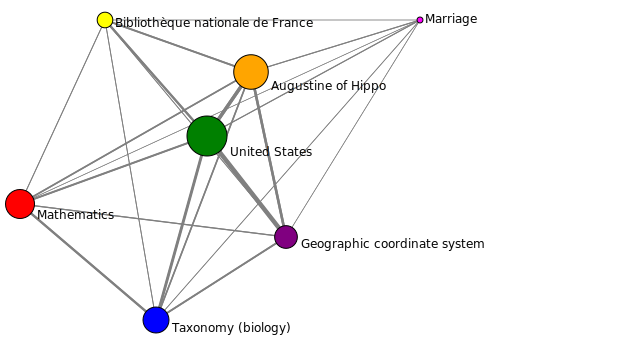

In [354]:
adjacency_aggregate = louvain.adjacency_
average_aggregate = normalize(membership_matrix(labels).T)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate,
                  names=(top_pages), labels=labels_unique, display_node_weight=True)
SVG(image)

##### Comparing clusters

In [296]:
inner_links = np.diag(adjacency_aggregate.toarray())
all_links = adjacency_aggregate.dot(np.ones(len(counts)))

In [299]:
top_k(inner_links, 7), top_k(all_links, 7)

(array([2, 3, 1, 0, 4, 5, 6], dtype=int64),
 array([2, 3, 1, 0, 4, 5, 6], dtype=int64))

The inner links (m_i) rules the distribution of the cluster importance.

Let's compare clusters now based on the cluster strength indicator: 

In [314]:
rhos = adjacency_aggregate.diagonal() / adjacency_aggregate.sum(axis=1).T

In [315]:
top_k(rhos, len(labels))

matrix([[1, 3, 0, 2, 5, 4, 6]], dtype=int64)

In [316]:
print("The strongest cluster is", np.argmax(rhos)+1, "while the weakest cluster is", np.argmin(rhos)+1)

The strongest cluster is 2 while the weakest cluster is 7


### For resolution = 2:

Top 5 pages in cluster 1 :
1 0.265% Taxonomy (biology)
2 0.221% Animal
3 0.135% Chordate
4 0.127% Cretaceous
5 0.124% Permian

Top 5 pages in cluster 2 :
1 0.283% Bibliothèque nationale de France
2 0.109% The New York Times
3 0.095% Jazz
4 0.092% Romanticism
5 0.088% Richard Wagner

Top 5 pages in cluster 3 :
1 0.177% Hydrogen
2 0.164% Oxygen
3 0.146% Electron
4 0.133% Carbon
5 0.131% Atom

Top 5 pages in cluster 4 :
1 0.120% Ottoman Empire
2 0.111% Roman Empire
3 0.109% Holy Roman Empire
4 0.108% Byzantine Empire
5 0.086% Russian Empire

Top 5 pages in cluster 5 :
1 0.168% United States
2 0.121% Olympic Games
3 0.110% Association football
4 0.099% Basketball
5 0.099% New York City

Top 5 pages in cluster 6 :
1 0.357% Mathematics
2 0.234% Real number
3 0.213% Function (mathematics)
4 0.176% Complex number
5 0.175% Leonhard Euler

Top 5 pages in cluster 7 :
1 0.226% The New York Times
2 0.174% Bibliothèque nationale de France
3 0.151% World War II
4 0.133% Time (magazine)
5 0.117% Sovie

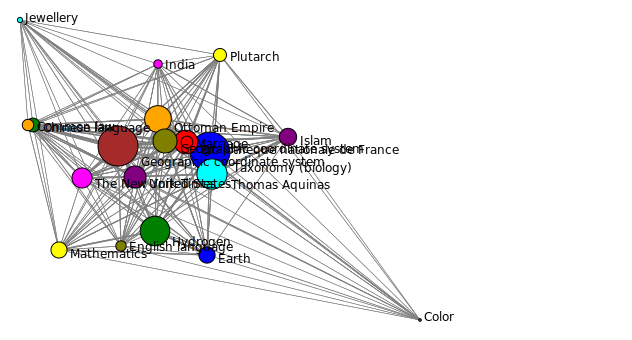

In [356]:
# Louvain clustering
louvain = Louvain(resolution=2)
labels = louvain.fit_transform(adjacency)
labels_unique, counts = np.unique(labels, return_counts=True)

# top-5 pages in each cluster
for label in labels_unique:
    idx = np.where(labels == label)[0]
    current_names = names[idx]
    seeds = dict(zip(idx, np.ones(len(idx))))
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency, seeds = seeds)
    scores -= scores0
    print("Top 5 pages in cluster", label+1, ":")
    top_nodes = top_k(scores, 5)
    for i, node in enumerate(top_nodes):
        print(i + 1, "{:.3%}".format(scores[top_nodes[i]]), names[node])
    print()

# aggregate Louvain, top-page in each cluster, print adjacency graph
top_pages = []
top_weights = []
for label in labels_unique:
    idx = np.where(labels == label)[0]
    seeds = dict(zip(idx, np.ones(len(idx))))
    
    pagerank = PageRank()
    scores = pagerank.fit_transform(adjacency, seeds = seeds)
    scores -= scores0
    top = names[np.argmax(scores)]
    print("cluster", label + 1, ":", top)
    top_pages.append(top)
    top_weights.append(np.max(scores))

adjacency_aggregate = louvain.adjacency_
average_aggregate = normalize(membership_matrix(labels).T)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate,
                  names=top_pages, labels=labels_unique, display_node_weight=True)
   
# clusters strength
rhos = adjacency_aggregate.diagonal() / adjacency_aggregate.sum(axis=1).T
print("\nstrenghts =", rhos)
print("The strongest cluster is", np.argmax(rhos)+1, "while the weakest cluster is", np.argmin(rhos)+1)

SVG(image) 

## 3. Bipartite graphs

## Cinema

In [387]:
graph = cinema

In [388]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Cluster the graph by Louvain (resolution 1). Use ``BiLouvain``.
* List the 10 largest clusters and display the names of the top-5 actors and top-5 movies of each cluster in terms of Personalized BiPageRank.

In [452]:
bilouvain = BiLouvain(resolution=1)
labels = bilouvain.fit_transform(biadjacency)

labels_unique, counts = np.unique(labels, return_counts=True)
len(labels_unique)

309

In [447]:
labels, bilouvain.labels_col_, bilouvain.labels_row_

(array([ 1,  0,  4, ..., 18, 22,  3], dtype=int64),
 array([ 1,  1,  1, ...,  3,  5, 19], dtype=int64),
 array([ 1,  0,  4, ..., 18, 22,  3], dtype=int64))

In [448]:
labels.shape[0], len(movies)

(88440, 88440)

In [423]:
biadj_agg = bilouvain.biadjacency_
bidegrees = biadj_agg.dot(np.ones(len(labels_unique)))

top_k(bilouvain.biadjacency_.diagonal(), 10), top_k(bidegrees, 10), top_k(counts, 10)

(array([ 0,  1,  2,  4,  3,  6,  5,  7,  8, 11], dtype=int64),
 array([ 0,  1,  2,  4,  3,  6,  5,  7,  8, 11], dtype=int64),
 array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9], dtype=int64))

##### Top-5 movies:

In [456]:
labels = bilouvain.labels_row_
labels_unique, counts = np.unique(labels, return_counts=True)

bipagerank0 = BiPageRank()
bipagerank0.fit(biadjacency)
scores0 = bipagerank0.scores_row_

# top-5 movies in each cluster
for label in labels_unique:
    idx = np.where(labels == label)[0]
    seeds = dict(zip(idx, np.ones(len(idx))))
    
    bipagerank = BiPageRank()
    bipagerank.fit(biadjacency, seeds_row = seeds)
    scores = bipagerank.scores_row_
    scores -= scores0
    print("Top 5 movies in cluster", label+1, ":")
    top_nodes = top_k(scores, 5)
    for i, node in enumerate(top_nodes):
        print(i + 1, "{:.3%}".format(scores[top_nodes[i]]), movies[node])
    print()
    

# print("Top 20 closest pages to Picasso: (for inwards links)\n")
# top_nodes = top_k(scores, 21)
# for i, node in enumerate(top_nodes):
#     print(i, "{:.2%}".format(scores[top_nodes[i]]), names[node])

Top 5 movies in cluster 1 :
1 0.022% The Walking Dead (TV series)
2 0.017% House of Cards (U.S. TV series)
3 0.017% Arrow (TV series)
4 0.015% Homeland (TV series)
5 0.015% Movie 43

Top 5 movies in cluster 2 :
1 0.023% Paramount on Parade
2 0.020% Ziegfeld Follies
3 0.018% The Crusades
4 0.018% Intolerance
5 0.018% Night Life in Hollywood

Top 5 movies in cluster 3 :
1 0.032% Kerala Cafe
2 0.031% Suyamvaram
3 0.023% Paalayam
4 0.022% Naduvazhikal
5 0.021% Puthukkottayile Puthumanavalan

Top 5 movies in cluster 4 :
1 0.047% Many Kisses Later
2 0.044% Kaamelott
3 0.041% Seances
4 0.040% Tatort
5 0.039% Gramps Is in the Resistance

Top 5 movies in cluster 5 :
1 0.027% Carry On (franchise)
2 0.026% Carry On Sergeant
3 0.025% Passport to Pimlico
4 0.022% 29 Acacia Avenue
5 0.022% What's Up Superdoc!

Top 5 movies in cluster 6 :
1 0.088% The Banquet (1991 film)
2 0.083% Lucky Stars
3 0.074% Seven Samurai
4 0.074% Five Senses of Eros
5 0.072% Infernal Affairs (film series)

Top 5 movies in c

Top 5 movies in cluster 51 :
1 2.752% Gehenna
2 2.722% Pan Twardowski (1936 film)
3 2.588% Kochaj tylko mnie
4 2.536% Barbara Radziwiłłówna
5 2.489% Serce matki

Top 5 movies in cluster 52 :
1 3.456% The Care Bears Adventure in Wonderland
2 3.315% The Care Bears' Big Wish Movie
3 2.971% The Care Bears Battle the Freeze Machine
4 2.603% The Legend of the North Wind
5 2.578% The Top of His Head

Top 5 movies in cluster 53 :
1 2.317% Deathstalker
2 2.081% State of Violence
3 1.852% Barbarian Queen
4 1.822% How to Steal 2 Million
5 1.644% The Gods Must Be Crazy

Top 5 movies in cluster 54 :
1 3.599% Channel 4's Comedy Gala (2011)
2 2.946% Channel 4's Comedy Gala (2010)
3 2.379% The Darkest Universe
4 2.335% Black Pond
5 2.256% Special People

Top 5 movies in cluster 55 :
1 1.900% Porky's Revenge!
2 1.886% Fury on Wheels
3 1.785% Big Money Hustlas
4 1.783% Time Walker
5 1.666% Assault on Precinct 13 (1976 film)

Top 5 movies in cluster 56 :
1 1.579% Arrah-na-Pogue
2 1.579% When Lovers Part


Top 5 movies in cluster 101 :
1 6.949% Dance Hall Racket
2 5.839% Glen or Glenda
3 4.843% Jail Bait (1954 film)
4 4.815% Thank You Mask Man
5 4.493% Gun Girls

Top 5 movies in cluster 102 :
1 9.680% Housewives on the Job
2 8.263% Raging Fists
3 8.103% de/Ein Mädchen fällt vom Himmel
4 7.233% La Vampire Nue
5 7.095% Le Frisson des Vampires

Top 5 movies in cluster 103 :
1 8.058% The Hills Have Eyes Part II
2 6.650% Mil Mascaras vs. the Aztec Mummy
3 6.398% Quints
4 5.897% Full Out
5 5.715% The Hills Have Eyes (1977 film)

Top 5 movies in cluster 104 :
1 9.993% Shotgun Wedding (2013 film)
2 9.905% The Casserole Club
3 8.841% Crazy Bitches
4 8.512% Who's Driving Doug
5 6.581% Itty Bitty Titty Committee

Top 5 movies in cluster 105 :
1 9.422% The Big Road
2 8.655% Lianhua Symphony
3 8.575% Three Modern Women
4 6.931% Little Toys
5 6.847% New Women

Top 5 movies in cluster 106 :
1 20.642% My Lonely Me
2 17.886% Birth of the Beatles
3 14.070% Bad Night for the Blues
4 12.070% To Die For (199

Top 5 movies in cluster 149 :
1 8.862% Vera, the Medium
2 8.720% Forget Me Not (1917 film)
3 8.554% The Divine Sacrifice
4 8.554% The Crucial Test
5 8.554% Her Maternal Right

Top 5 movies in cluster 150 :
1 19.447% Hard Feelings
2 17.309% Cindy
3 13.804% Breaking All the Rules
4 9.288% Frogs
5 2.044% The Visitor (TV series)

Top 5 movies in cluster 151 :
1 20.686% Hush (2008 film)
2 14.299% Strawberry Fields (2011 film)
3 10.967% Mad About Mambo
4 9.864% Code of a Killer
5 2.592% Affinity

Top 5 movies in cluster 152 :
1 30.579% Popatopolis
2 16.618% Monster from the Ocean Floor
3 12.823% The Hills Have Thighs
4 11.771% Teenage Monster
5 0.780% No Pain, No Gain

Top 5 movies in cluster 153 :
1 18.437% The Custom Mary
2 17.715% Resilience
3 12.661% Freeway Killer
4 10.297% Harry + Max
5 1.588% Bring It On Again

Top 5 movies in cluster 154 :
1 30.297% Eyes in the Dark
2 20.950% Zoo (2007 film)
3 12.675% Warrior's End
4 12.675% Land Ho!
5 7.981% This Is Martin Bonner

Top 5 movies in cl

Top 5 movies in cluster 199 :
1 12.439% The Rage (2007 film)
2 12.052% Play-mate of the Apes
3 12.052% SpiderBabe
4 12.052% The Seduction of Misty Mundae
5 12.052% Bite Me!

Top 5 movies in cluster 200 :
1 50.172% Remix (TV series)
2 35.290% Detective Naani
3 7.010% Chain Kulii Ki Main Kulii
4 0.807% U R My Jaan
5 0.205% Jerry

Top 5 movies in cluster 201 :
1 17.952% Spirit of Youth
2 14.385% The Notorious Elinor Lee
3 14.385% Lying Lips
4 11.546% The Super Fight
5 9.620% The Secret of the Purple Reef

Top 5 movies in cluster 202 :
1 23.581% Cruel Summer
2 15.320% Djinn
3 14.482% The Young Blood Chronicles
4 1.140% The Attack
5 1.073% Maniac (2011 film)

Top 5 movies in cluster 203 :
1 28.457% Liar, Liar, Vampire
2 20.390% The Unauthorized Saved by the Bell Story
3 15.196% Booky's Crush
4 3.892% The Devil's Mercy
5 3.371% No Stranger Than Love

Top 5 movies in cluster 204 :
1 14.881% The Union (2011 film)
2 10.198% Human Highway
3 10.134% Year of the Horse
4 10.134% Neil Young Trunk Sh

Top 5 movies in cluster 248 :
1 36.512% Chemical Wedding
2 25.127% Broken Barrier
3 4.674% The Body (2001 film)
4 0.782% Creditors (2015 film)
5 0.582% Outlander (TV series)

Top 5 movies in cluster 249 :
1 39.356% The Boxer (2012 film)
2 35.368% Mam
3 2.681% Bonobo
4 2.625% The Green Man (Amis novel)
5 2.341% Finding Your Feet

Top 5 movies in cluster 250 :
1 17.507% Prince Jack
2 14.413% Gone Are the Dayes
3 13.735% Greenwich Village Story
4 0.609% Gas (1981 film)
5 0.537% Montenegro

Top 5 movies in cluster 251 :
1 39.387% Santa Hunters
2 35.525% Game Shakers
3 3.124% Honeydripper
4 2.462% Clifford's Really Big Movie
5 2.440% Battle of Los Angeles

Top 5 movies in cluster 252 :
1 42.320% The Aviary
2 23.617% Timber Falls
3 2.135% Kiss Me, Kill Me (2015 film)
4 2.016% The Comebacks
5 2.013% Night of the Living Dead 3D

Top 5 movies in cluster 253 :
1 47.691% The Muthers
2 26.809% Darktown Strutters
3 3.120% Lunch Wagon
4 2.772% Chesty Anderson, USN
5 2.415% The Swinging Cheerleaders


Top 5 movies in cluster 296 :
1 59.673% Feet of Clay (2007 film)
2 22.274% Ready? OK!
3 1.627% Lovespring International
4 1.587% Timer
5 1.530% Straight-Jacket

Top 5 movies in cluster 297 :
1 62.149% Slamma Jamma
2 17.112% Flight World War II
3 2.208% Jinn
4 2.195% Torn (2013 American film)
5 1.095% Locating Silver Lake

Top 5 movies in cluster 298 :
1 26.537% Last Night at the Alamo
2 26.537% The Whole Shootin' Match
3 22.878% The Cellar
4 2.439% The Man with the Perfect Swing
5 1.811% Amerika (miniseries)

Top 5 movies in cluster 299 :
1 60.537% Inertia
2 15.635% Seven Times Lucky
3 2.075% Live Bait
4 1.703% Chi
5 0.690% The Grand Seduction

Top 5 movies in cluster 300 :
1 29.214% The Inheritance (2007 film)
2 28.691% Dark Nature
3 0.744% London Road
4 0.738% Peaky Blinders (TV series)
5 0.661% LD 50 Lethal Dose

Top 5 movies in cluster 301 :
1 58.903% Labou
2 17.394% Diary of the Dead
3 1.124% Betas
4 1.042% Free Fall (1999 film)
5 0.939% Heartland (Canadian TV series)

Top 5 movie

##### Top-5 actors:

In [457]:
labels = bilouvain.labels_col_
labels_unique, counts = np.unique(labels, return_counts=True)

bipagerank0 = BiPageRank()
bipagerank0.fit(biadjacency)
scores0 = bipagerank0.scores_col_

# top-5 actors in each cluster
for label in labels_unique:
    idx = np.where(labels == label)[0]
    seeds = dict(zip(idx, np.ones(len(idx))))
    
    bipagerank = BiPageRank()
    bipagerank.fit(biadjacency, seeds_col = seeds)
    scores = bipagerank.scores_col_
    scores -= scores0
    print("Top 5 actors in cluster", label+1, ":")
    top_nodes = top_k(scores, 5)
    for i, node in enumerate(top_nodes):
        print(i + 1, "{:.3%}".format(scores[top_nodes[i]]), actors[node])
    print()

Top 5 actors in cluster 1 :
1 0.040% Eric Roberts
2 0.039% Danny Trejo
3 0.036% Danny Glover
4 0.035% Lance Henriksen
5 0.033% Michael Madsen

Top 5 actors in cluster 2 :
1 0.107% William Boyd
2 0.100% Roy Barcroft
3 0.090% Allan Lane
4 0.085% John Wayne
5 0.079% Raymond Hatton

Top 5 actors in cluster 3 :
1 0.342% Prakash Raj
2 0.330% Mammootty
3 0.323% Jagathy Sreekumar
4 0.291% Nedumudi Venu
5 0.290% Mohanlal

Top 5 actors in cluster 4 :
1 0.186% Louis de Funès
2 0.154% Gérard Depardieu
3 0.119% Totò
4 0.098% Catherine Jacob
5 0.094% Catherine Deneuve

Top 5 actors in cluster 5 :
1 0.138% Christopher Lee
2 0.104% Peter Cushing
3 0.100% Sid James
4 0.095% John Stuart
5 0.088% Stewart Rome

Top 5 actors in cluster 6 :
1 0.283% Andy Lau
2 0.199% Simon Yam
3 0.190% Eric Tsang
4 0.166% Anthony Wong (Hong Kong actor)
5 0.161% Tony Leung Ka-fai

Top 5 actors in cluster 7 :
1 0.532% Mithun Chakraborty
2 0.324% Naseeruddin Shah
3 0.324% Om Puri
4 0.321% Anupam Kher
5 0.318% Dharmendra

Top 5

Top 5 actors in cluster 57 :
1 9.193% Kim Jin-kyu
2 7.009% Shin Young-kyun
3 6.864% Kim Ji-mee
4 5.334% Shin Seong-il
5 5.236% Choi Moo-ryong

Top 5 actors in cluster 58 :
1 3.408% Kate Lyn Sheil
2 2.982% Joe Swanberg
3 2.685% Sophia Takal
4 2.679% Larry Fessenden
5 2.542% Reggie Bannister

Top 5 actors in cluster 59 :
1 2.564% Kirby Heyborne
2 2.413% Jennette McCurdy
3 2.293% Ciara Bravo
4 1.908% Daryn Tufts
5 1.609% Dana Snyder

Top 5 actors in cluster 60 :
1 2.577% Maxim Roy
2 2.552% Stephanie Morgenstern
3 2.178% Gabrielle Rose
4 1.968% Liliane Nemri
5 1.967% William Hutt

Top 5 actors in cluster 61 :
1 3.351% Rebekah Kochan
2 3.222% Caitlin FitzGerald
3 2.016% Tom Nagel
4 1.939% Cassandra Peterson
5 1.920% Erica Roby

Top 5 actors in cluster 62 :
1 8.896% Lottie Lyell
2 7.181% Marie Lorraine
3 6.148% Arthur Tauchert
4 5.447% Tal Ordell
5 5.337% Bert Bailey

Top 5 actors in cluster 63 :
1 4.021% Pat Barrington
2 3.118% Kitten Natividad
3 3.018% Stuart Lancaster
4 2.741% Uschi Digar

Top 5 actors in cluster 113 :
1 6.563% Charlie Barnett
2 5.919% Dora Madison Burge
3 5.352% Sorel Carradine
4 5.284% Kara Killmer
5 4.491% Brian Steele

Top 5 actors in cluster 114 :
1 10.295% Mark Borchardt
2 9.402% Trace Beaulieu
3 7.557% Mary Jo Pehl
4 7.557% Joel Hodgson
5 7.557% J. Elvis Weinstein

Top 5 actors in cluster 115 :
1 9.726% Ross Thomas
2 7.908% Tina Holmes
3 6.812% Lea DeLaria
4 6.777% Amy Purdy
5 6.777% Nora Kirkpatrick

Top 5 actors in cluster 116 :
1 7.792% Diane Sommerfield
2 7.625% Rod Perry
3 7.064% Lisa Jane Persky
4 5.424% Mark Shera
5 5.414% Jim Jacobs

Top 5 actors in cluster 117 :
1 42.936% Erwin Geschonneck
2 25.768% Angelica Domröse
3 15.712% Käthe Braun
4 6.311% Armin Mueller-Stahl
5 0.085% Barbara Sukowa

Top 5 actors in cluster 118 :
1 7.784% Craig Chester
2 6.790% James Lyons (film editor)
3 6.201% Liane Curtis
4 6.115% Anthony Barrile
5 4.979% Caitlin Clarke

Top 5 actors in cluster 119 :
1 12.652% Willam Belli
2 10.061% Rachel Dratch
3 6.841% Wendy 

Top 5 actors in cluster 169 :
1 32.130% Michael Ostrowski
2 22.030% de/Raimund Wallisch
3 13.819% Adele Neuhauser
4 13.497% de/Brigitte Kren
5 0.801% Manfred Krug

Top 5 actors in cluster 170 :
1 30.808% Melanie Winiger
2 23.270% Michael Koch (film director)
3 17.043% Carlos Leal
4 14.421% Max Loong
5 4.191% Hannah Herzsprung

Top 5 actors in cluster 171 :
1 20.052% John Giorno
2 16.061% Dick Cavett
3 12.187% Dominick Dunne
4 12.187% Joan Juliet Buck
5 6.886% Daniel Richter

Top 5 actors in cluster 172 :
1 20.116% André S. Labarthe
2 18.404% Sady Rebbot
3 15.891% Jean-Pierre Melville
4 15.891% Johnnie To
5 15.891% Bertrand Tavernier

Top 5 actors in cluster 173 :
1 27.535% Doug Stanhope
2 19.884% Tig Notaro
3 11.351% Jim Jefferies (comedian)
4 4.048% J. K. Simmons
5 4.001% Sarah Silverman

Top 5 actors in cluster 174 :
1 16.881% Garrick Dowhen
2 15.763% Kerry Remsen
3 11.647% Pamela Bach
4 11.647% Douglas Rowe
5 10.107% Deborah Rennard

Top 5 actors in cluster 175 :
1 13.285% Taylor Sp

1 39.920% Émile Genest
2 21.302% Jean Coutu
3 21.302% John Drainie
4 7.111% Walter Pidgeon
5 0.269% Greer Garson

Top 5 actors in cluster 224 :
1 25.459% Nick Nicholson
2 19.229% Kaz Garas
3 15.472% Deborah Tranelli
4 10.929% Carmen Argenziano
5 5.739% Stewart Granger

Top 5 actors in cluster 225 :
1 24.890% Susan Ruttan
2 21.174% Paula Abdul
3 18.182% Adrienne Frantz
4 6.307% Adrian Pasdar
5 2.266% Julia Nickson

Top 5 actors in cluster 226 :
1 22.848% Barry Dennen
2 16.886% Ted Neeley
3 16.886% Carl Anderson (singer)
4 16.886% Yvonne Elliman
5 1.065% Bill Bixby

Top 5 actors in cluster 227 :
1 31.927% Mast Ali
2 31.927% Dheer Charan Srivastav
3 18.002% Aziz Naser
4 7.134% Ganesh Venkatraman
5 0.286% Trisha

Top 5 actors in cluster 228 :
1 78.806% Kelly Slater
2 7.489% Joel Edgerton
3 0.288% Mirrah Foulkes
4 0.135% Antony Starr
5 0.126% Lisa Chappell

Top 5 actors in cluster 229 :
1 38.994% Spencer Williams
2 21.101% Francine Everett
3 15.657% Herb Jeffries
4 12.313% Mantan Moreland
5

1 19.177% Suzanne Lanza
2 19.177% Joey Dedio
3 19.177% Darnell Williams
4 13.460% Mike Epps
5 0.330% John Witherspoon

Top 5 actors in cluster 280 :
1 37.945% Rosie Fellner
2 23.083% Ben Peyton
3 15.717% Paris Hilton
4 0.972% Nicky Hilton Rothschild
5 0.788% Melissa Molinaro

Top 5 actors in cluster 281 :
1 42.382% Tim Pocock
2 32.696% Dan Ewing
3 14.686% Martin Copping
4 2.688% Danny Trejo
5 0.724% Rose McGowan

Top 5 actors in cluster 282 :
1 41.037% Fausto Mata
2 26.968% Denise Quiñones
3 2.458% Paul Calderón
4 2.340% Margo Martindale
5 2.326% Manny Pérez

Top 5 actors in cluster 283 :
1 40.060% Trishelle Cannatella
2 32.136% Steven Hill (model)
3 10.280% Michael Paré
4 0.194% Jo Champa
5 0.189% Francis Magee

Top 5 actors in cluster 284 :
1 24.835% Callie Hernandez
2 23.103% Valorie Curry
3 23.103% James Allen McCune
4 2.152% Nick Nolte
5 2.151% Sela Ward

Top 5 actors in cluster 285 :
1 40.801% Seidy López
2 32.333% Taboo (rapper)
3 10.066% Jacob Vargas
4 0.669% Leonor Varela
5 0.

In [459]:
bimodularity(biadjacency, labels=bilouvain.labels_row_, labels_col=bilouvain.labels_col_)

0.7797798185287221

In [474]:
print("there are", counts[0], "actors in the stronngest cluster.")

there are 10884 actors in the stronngest cluster.


In [475]:
adjacency_aggregate = bilouvain.biadjacency_
rhos = adjacency_aggregate.diagonal() / adjacency_aggregate.sum(axis=1).T

In [479]:
np.argmax(rhos) + 1, np.max(rhos)

(71, 1.0)

In [480]:
counts[71]

30